In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import src.data_preprocessing as dp

In [2]:
df = dp.preprocess_data()

/Users/ctrimborn/Downloads/portfolio projects/alcohol-consumption/src/data_preprocessing.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["year"] = df_filtered["source_file"].str.extract(r"(20\d{2})")


# Exploratory Data Analysis

In [7]:
df

,ALCEVER,UADBUND,ALCMDAYS,UADPUBL,ALCAGLST,ALCYFU,ALCREC,source_file,UADPEOP,ALCYLU,...,ALCMFU,ALCBNG30D,ALCYRBFR,ALCYRTOT,ALCYR,IRSEX,UADCAG,UADBAR,UADROTH,year
0,1,3.0,1,2.0,999,9999,1,NSDUH_2023_Tab.txt,2.0,9999,...,99,0,1,36,1,1,5.0,2.0,2.0,2023
1,2,3.0,5,NaN,991,9991,91,NSDUH_2023_Tab.txt,4.0,9991,...,91,91,91,991,0,1,5.0,NaN,NaN,2023
2,1,3.0,1,NaN,999,9999,1,NSDUH_2023_Tab.txt,4.0,9999,...,99,0,1,48,1,2,5.0,NaN,NaN,2023
3,1,3.0,3,NaN,999,9999,1,NSDUH_2023_Tab.txt,4.0,9999,...,99,5,1,156,1,1,5.0,NaN,NaN,2023
4,1,3.0,5,NaN,25,9999,2,NSDUH_2023_Tab.txt,4.0,2023,...,99,93,2,24,1,2,5.0,NaN,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135288,1,3.0,5,NaN,21,9999,3,NSDUH_2019_Tab.txt,4.0,2018,...,99,93,2,993,0,1,5.0,NaN,NaN,2019
135289,1,3.0,2,2.0,999,2018,1,NSDUH_2019_Tab.txt,3.0,9999,...,10,4,2,54,1,2,5.0,2.0,2.0,2019
135290,1,3.0,2,NaN,999,9999,1,NSDUH_2019_Tab.txt,4.0,9999,...,99,0,1,208,1,2,5.0,NaN,NaN,2019
135291,1,3.0,1,NaN,999,9999,1,NSDUH_2019_Tab.txt,4.0,9999,...,99,2,1,104,1,2,5.0,NaN,NaN,2019


Text(0.5, 1.0, 'Distribution of people who have tried alcohol (1=yes, 2=no)')

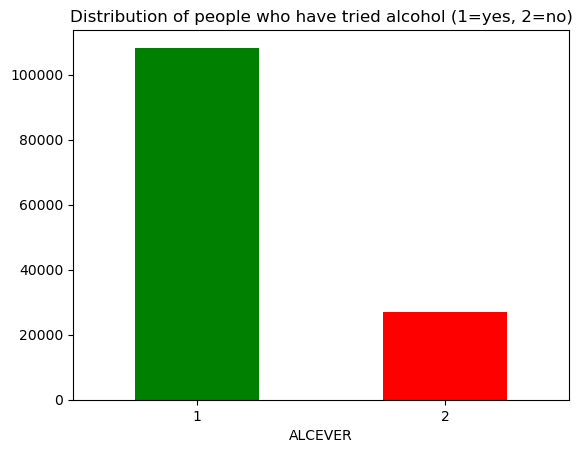

In [33]:
df['ALCEVER'].value_counts().plot(kind='bar', color=['g','r'])
plt.xticks(rotation=0)
plt.title("Distribution of people who have tried alcohol (1=yes, 2=no)")

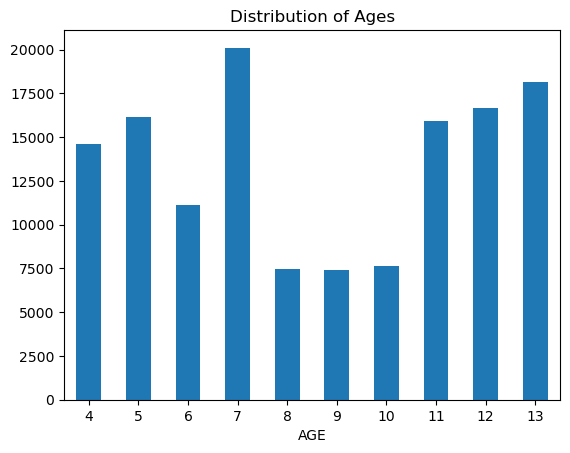

In [34]:
df['AGE'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Distribution of Ages")
plt.show()

4 --> 7-9 <br>
5 --> 10-11 <br>
6 --> 12 <br>
7 --> 13 <br>

In [92]:
#create buckets for age
df["age_bucket"] = None

df.loc[(df["year"].isin(['2021', '2022', '2023'])) & (df["AGE"] == 4), "age_bucket"] = "18-20"
df.loc[(df["year"].isin(['2021', '2022', '2023'])) & (df["AGE"] == 5), "age_bucket"] = "21-23"
df.loc[(df["year"].isin(['2021', '2022', '2023'])) & (df["AGE"] == 6), "age_bucket"] = "24-25"
df.loc[(df["year"].isin(['2021', '2022', '2023'])) & (df["AGE"] == 7), "age_bucket"] = "26-29"

df.loc[(~df["year"].isin([2021, 2022, 2023])) & (df["AGE"].between(7, 9)), "age_bucket"] = "18-20"
df.loc[(~df["year"].isin([2021, 2022, 2023])) & (df["AGE"].isin([10, 11])), "age_bucket"] = "21-23"
df.loc[(~df["year"].isin([2021, 2022, 2023])) & (df["AGE"] == 12), "age_bucket"] = "24-25"
df.loc[(~df["year"].isin([2021, 2022, 2023])) & (df["AGE"] == 13), "age_bucket"] = "26-29"

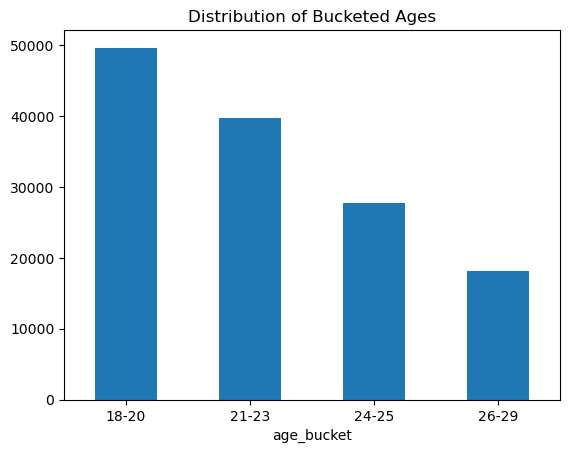

In [97]:
df['age_bucket'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Distribution of Bucketed Ages")
plt.show()

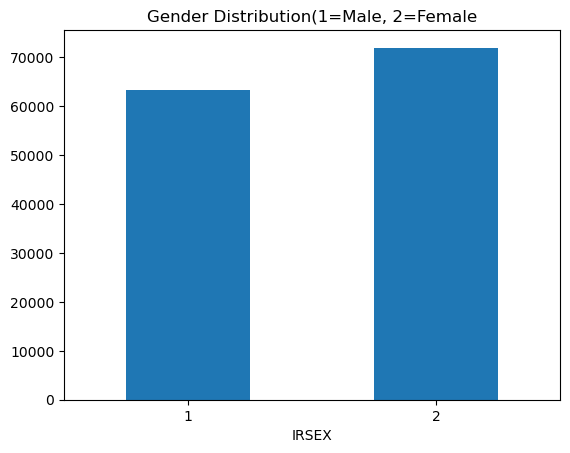

In [121]:
df['IRSEX'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Gender Distribution(1=Male, 2=Female")
plt.show()

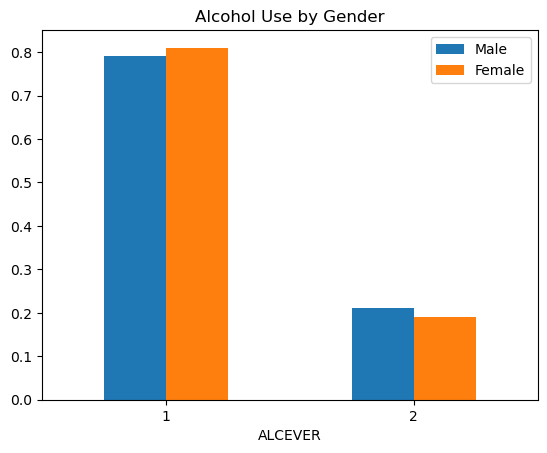

In [120]:
gender_counts = (
    df.groupby("IRSEX")["ALCEVER"]
    .value_counts(normalize=True)  # gives proportions (0 to 1)
    .rename("percent")
    .reset_index()
)
genders = gender_counts.pivot(index="ALCEVER",columns="IRSEX", values="percent")
genders.plot(kind='bar')
plt.legend(["Male", "Female"])
plt.xticks(rotation=0)
plt.title("Alcohol Use by Gender")
plt.show()

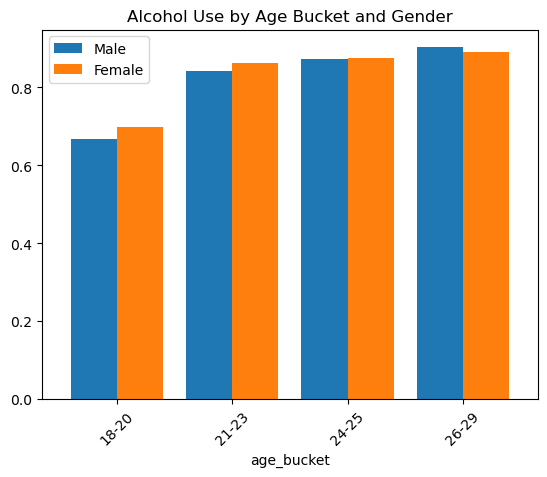

In [119]:
plot_df = (
    df.groupby(["age_bucket", "IRSEX"])["ALCEVER"]
    .value_counts(normalize=True)
    .rename("percent")
    .reset_index()
)

plot_df = plot_df[plot_df["ALCEVER"] == 1]

pivot_df = plot_df.pivot(index="age_bucket", columns="IRSEX", values="percent")

pivot_df.plot(kind="bar", width=0.8)
plt.legend(["Male", "Female"])
plt.xticks(rotation=45)
plt.title("Alcohol Use by Age Bucket and Gender")
plt.show()